In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from PIL import Image
from keras.preprocessing import image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pathlib
from glob import glob

# Data Visualization

In [2]:
train_data=pathlib.Path("train")

In [3]:
image_dataset=image_dataset_from_directory(train_data,image_size=(224,224))

Found 833 files belonging to 2 classes.


In [4]:
classes=image_dataset.class_names
classes

['dis', 'fresh']

In [5]:
file_path_dict={}

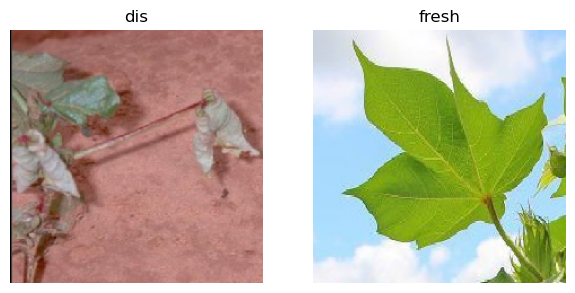

In [6]:
for c in classes:
    file_path_dict[c]=list(map(lambda x:str(train_data)+"/"+c+"/"+x,os.listdir(str(train_data)+"/"+c)))

plt.figure(figsize=(15,15))
index=1;
for c in classes:
    path=file_path_dict[c][0]
    plt.subplot(1,4,index)
    index+=1
    plt.imshow(load_img(path,target_size=(224,224)))
    plt.title(c)
    plt.axis(False)

In [7]:
train_images=len(list(train_data.glob("*/*.jpg")))
train_images

788

In [8]:
def class_data(dic):
    
    count=[]
    for c in pathlib.Path(train_data).iterdir():
        count.append(len([name for name in os.listdir(c)]))
        
    sub_dir=[name for name in os.listdir(dic)]

    return pd.DataFrame(list(zip(sub_dir,count)),columns=["classes","count"])

In [9]:
df=class_data(train_data)
df

,classes,count
0,dis,414
1,fresh,420


<Axes: xlabel='count', ylabel='classes'>

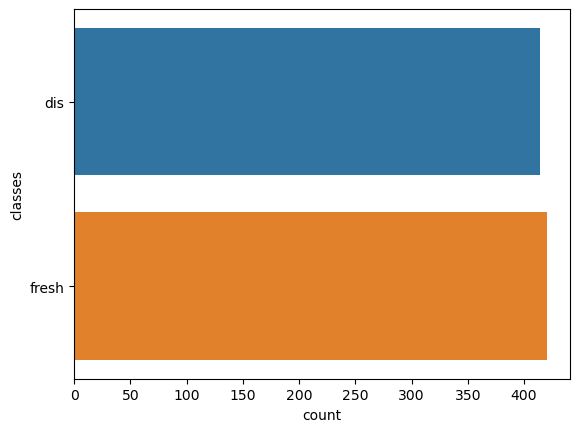

In [10]:
sns.barplot(x="count",y="classes",data=df,label="Class")

# Data Preprocessing

In [11]:
class_names=["dis","fresh"]

In [12]:
data=[]
for c in class_names:
    path=os.path.join("train",c)
    label=class_names.index(c)
    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        data.append([img,label])
       
    print(path)

train\dis
train\fresh


In [13]:
len(data)

834

In [14]:
data[0]

[array([[[  0,   0,   4],
         [ 36,  39,  60],
         [ 61,  70, 115],
         ...,
         [107, 114, 171],
         [105, 112, 169],
         [108, 115, 172]],
 
        [[  0,   0,   4],
         [ 36,  39,  60],
         [ 61,  70, 115],
         ...,
         [110, 118, 175],
         [110, 117, 174],
         [113, 120, 177]],
 
        [[  0,   0,   4],
         [ 36,  39,  60],
         [ 60,  69, 114],
         ...,
         [113, 120, 177],
         [112, 119, 176],
         [115, 122, 179]],
 
        ...,
 
        [[  2,   0,   3],
         [ 39,  41,  59],
         [127, 132, 171],
         ...,
         [127, 138, 196],
         [130, 141, 199],
         [133, 144, 202]],
 
        [[  3,   0,   1],
         [ 38,  40,  57],
         [126, 131, 167],
         ...,
         [127, 138, 196],
         [126, 137, 196],
         [127, 138, 196]],
 
        [[  3,   0,   1],
         [ 40,  41,  56],
         [125, 130, 164],
         ...,
         [119, 130, 188],
  

In [15]:
random.shuffle(data)

In [16]:
x=[]
y=[]
for feature,target in data:
    x.append(feature)
    y.append(target)

In [17]:
len(x),len(y)

(834, 834)

In [18]:
x=np.array(x)
y=np.array(y)

In [19]:
x.shape,y.shape

((834, 224, 224, 3), (834,))

In [20]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [21]:
x=x/255

In [22]:
x[0]

array([[[0.16862745, 0.25098039, 0.3372549 ],
        [0.16470588, 0.24705882, 0.32941176],
        [0.13333333, 0.21176471, 0.29803922],
        ...,
        [0.30588235, 0.45098039, 0.34901961],
        [0.30196078, 0.45490196, 0.35294118],
        [0.30196078, 0.4627451 , 0.35686275]],

       [[0.16470588, 0.24313725, 0.31764706],
        [0.15686275, 0.23137255, 0.30980392],
        [0.1254902 , 0.20392157, 0.27843137],
        ...,
        [0.34901961, 0.50588235, 0.4       ],
        [0.33333333, 0.49803922, 0.39215686],
        [0.31764706, 0.48627451, 0.38039216]],

       [[0.14509804, 0.21568627, 0.28235294],
        [0.12941176, 0.2       , 0.26666667],
        [0.10196078, 0.17254902, 0.23921569],
        ...,
        [0.2745098 , 0.43921569, 0.33333333],
        [0.24705882, 0.41568627, 0.30980392],
        [0.22745098, 0.40392157, 0.29803922]],

       ...,

       [[0.17254902, 0.21568627, 0.29411765],
        [0.17647059, 0.21960784, 0.29803922],
        [0.16862745, 0

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [24]:
x_train.shape,x_test.shape

((667, 224, 224, 3), (167, 224, 224, 3))

# Apply Transfer Learning Technique

## CNN Model VGG16

In [25]:
vgg=VGG16()

In [26]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
model=Sequential()

In [28]:
for layer in vgg.layers[:-1]:
    model.add(layer)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [30]:
for layer in model.layers:
    layer.trainable=False

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [32]:
model.add(Dense(1,activation="sigmoid"))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [36]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
earlystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)

In [37]:
history=model.fit(x_train, y_train, epochs=15, batch_size=32, validation_split=0.2,verbose=1,validation_data=(x_test,y_test),callbacks=earlystop)

Epoch 1/15
21/21 [==============================] - 119s 6s/step - loss: 0.6605 - accuracy: 0.6132 - val_loss: 0.4325 - val_accuracy: 0.8623
Epoch 2/15
21/21 [==============================] - 99s 5s/step - loss: 0.3687 - accuracy: 0.8606 - val_loss: 0.3384 - val_accuracy: 0.8683
Epoch 3/15
21/21 [==============================] - 98s 5s/step - loss: 0.3070 - accuracy: 0.8846 - val_loss: 0.2985 - val_accuracy: 0.8982
Epoch 4/15
21/21 [==============================] - 102s 5s/step - loss: 0.2741 - accuracy: 0.8996 - val_loss: 0.2916 - val_accuracy: 0.8743
Epoch 5/15
21/21 [==============================] - 111s 5s/step - loss: 0.2478 - accuracy: 0.9100 - val_loss: 0.2393 - val_accuracy: 0.9042
Epoch 6/15
21/21 [==============================] - 101s 5s/step - loss: 0.2102 - accuracy: 0.9280 - val_loss: 0.2264 - val_accuracy: 0.9042
Epoch 7/15
21/21 [==============================] - 101s 5s/step - loss: 0.1939 - accuracy: 0.9355 - val_loss: 0.2178 - val_accuracy: 0.9102
Epoch 8/15
21/2

In [38]:
model.save("model_New_1.h5")

C:\Users\PMYLS\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
def detection(path):
    img=cv2.imread(path)
   # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.resize(img,(224,224))
    #print(img.shape)
    y_pred=model.predict(img.reshape(1,224,224,3))
    pred_Value=np.round(y_pred)
    return pred_Value
    

In [40]:
detection("dataset/test/dis/4.jpg")

1/1 [==============================] - 1s 774ms/step


array([[0.]], dtype=float32)

In [41]:
detection("dataset/test/fresh/5.jpg")

1/1 [==============================] - 0s 300ms/step


array([[1.]], dtype=float32)

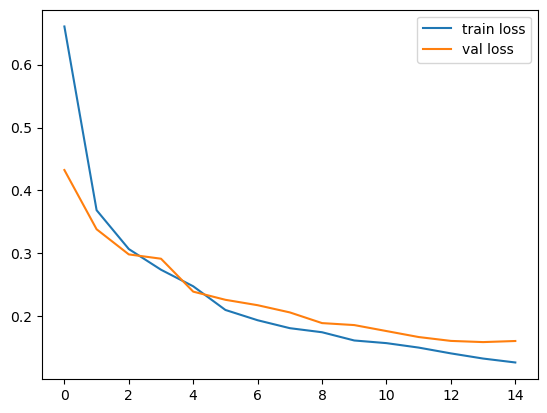

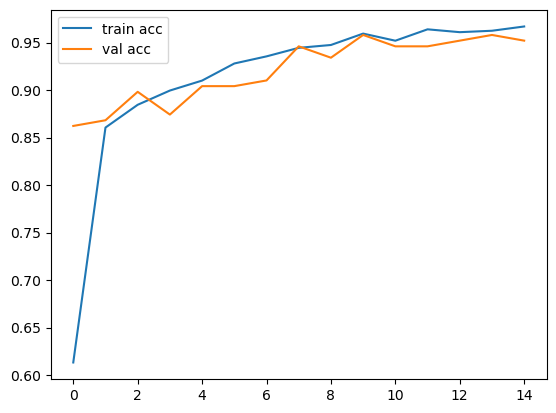

<Figure size 640x480 with 0 Axes>

In [42]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')